In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



C:\Users\USER\.anaconda\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('geodata.csv')

In [3]:
data.head()

id       lat      lon country    city
0    46  51.50642 -0.12721     GBR  London
1   322  51.50642 -0.12721     GBR  London
2   344  51.50642 -0.12721     GBR  London
3   717  51.50642 -0.12721     GBR  London
4  1136  51.50642 -0.12721     GBR  London

In [4]:
data.country.value_counts()

country
USA    3003
GBR     554
CAN     298
IND     208
AUS     158
       ... 
GMB       1
ALB       1
LVA       1
BHR       1
PRY       1
Name: count, Length: 129, dtype: int64

In [5]:
data.shape

(5411, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       5411 non-null   int64  
 1   lat      5411 non-null   float64
 2   lon      5411 non-null   float64
 3   country  5379 non-null   object 
 4   city     3727 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 211.5+ KB


In [7]:
  data.columns

Index(['id', 'lat', 'lon', 'country', 'city'], dtype='object')

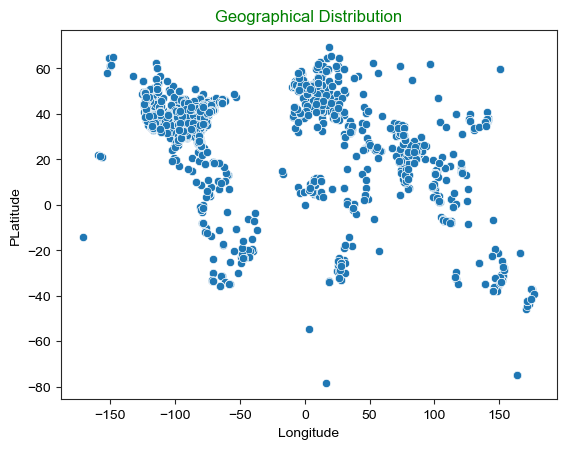

In [8]:
sns.set_style("ticks")
sns.scatterplot(x = 'lon', y ='lat', data=data, palette = "mako")
plt.xlabel("Longitude", size = 10, color = "black")
plt.ylabel("PLatitude", size = 10, color = "black")
plt.title("Geographical Distribution", size =12, color = "green")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.show()

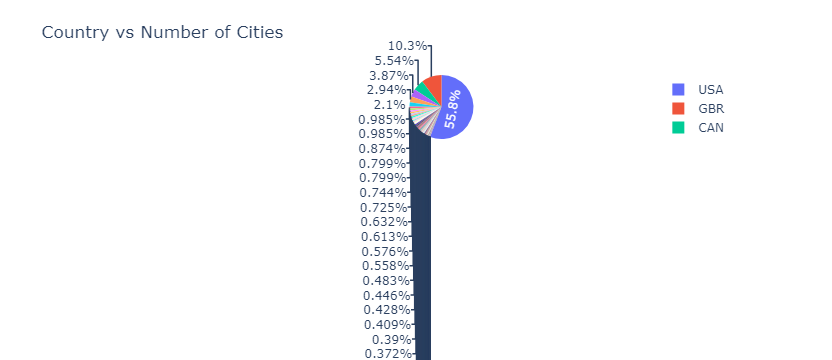

In [9]:
# Create a pie chart
city_count = data['country'].value_counts()
fig = px.pie(city_count, names=city_count.index, values=city_count.values, title='Country vs Number of Cities')
fig.show()

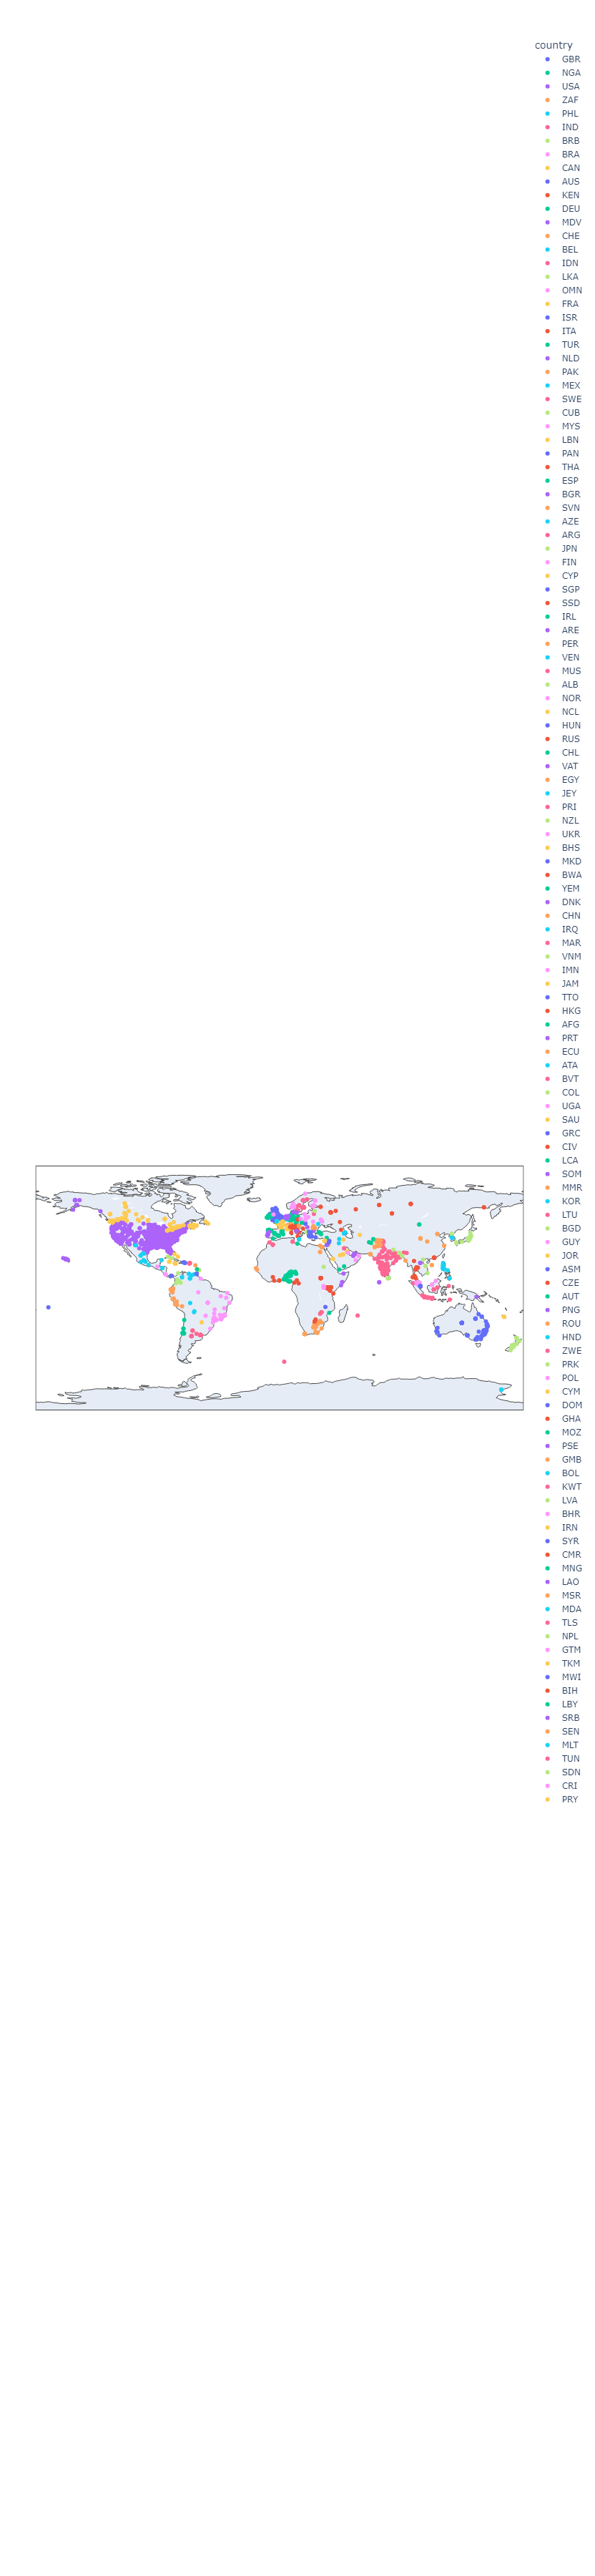

In [10]:
# Map: city vs. lat and lon
fig = px.scatter_geo(data, lat='lat', lon='lon', hover_name='city', title='City Map')
fig = px.scatter_geo(data, lat='lat', lon='lon', hover_name='city', color='country')
fig.update_layout(mapbox_zoom=4) 

fig.update_layout(
    mapbox_style="open-street-map",  # Change map style
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust chart margins
)
fig.show()


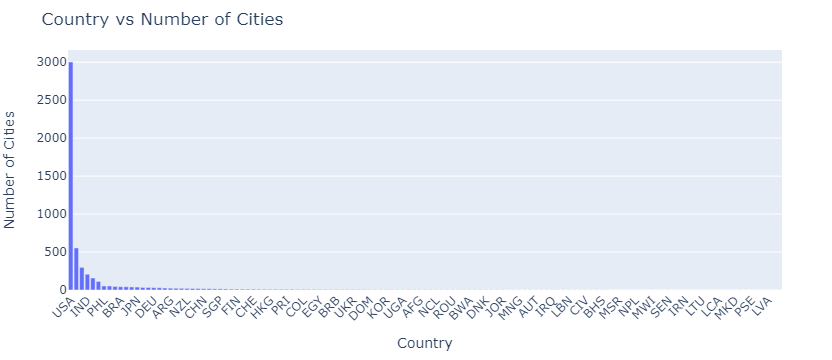

In [11]:
# Create a bar chart
city_count = data['country'].value_counts().reset_index()
city_count.columns = ['country', 'num_cities']
fig = px.bar(city_count, x='country', y='num_cities', title='Country vs Number of Cities')
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Cities',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust chart margins
)
fig.show()


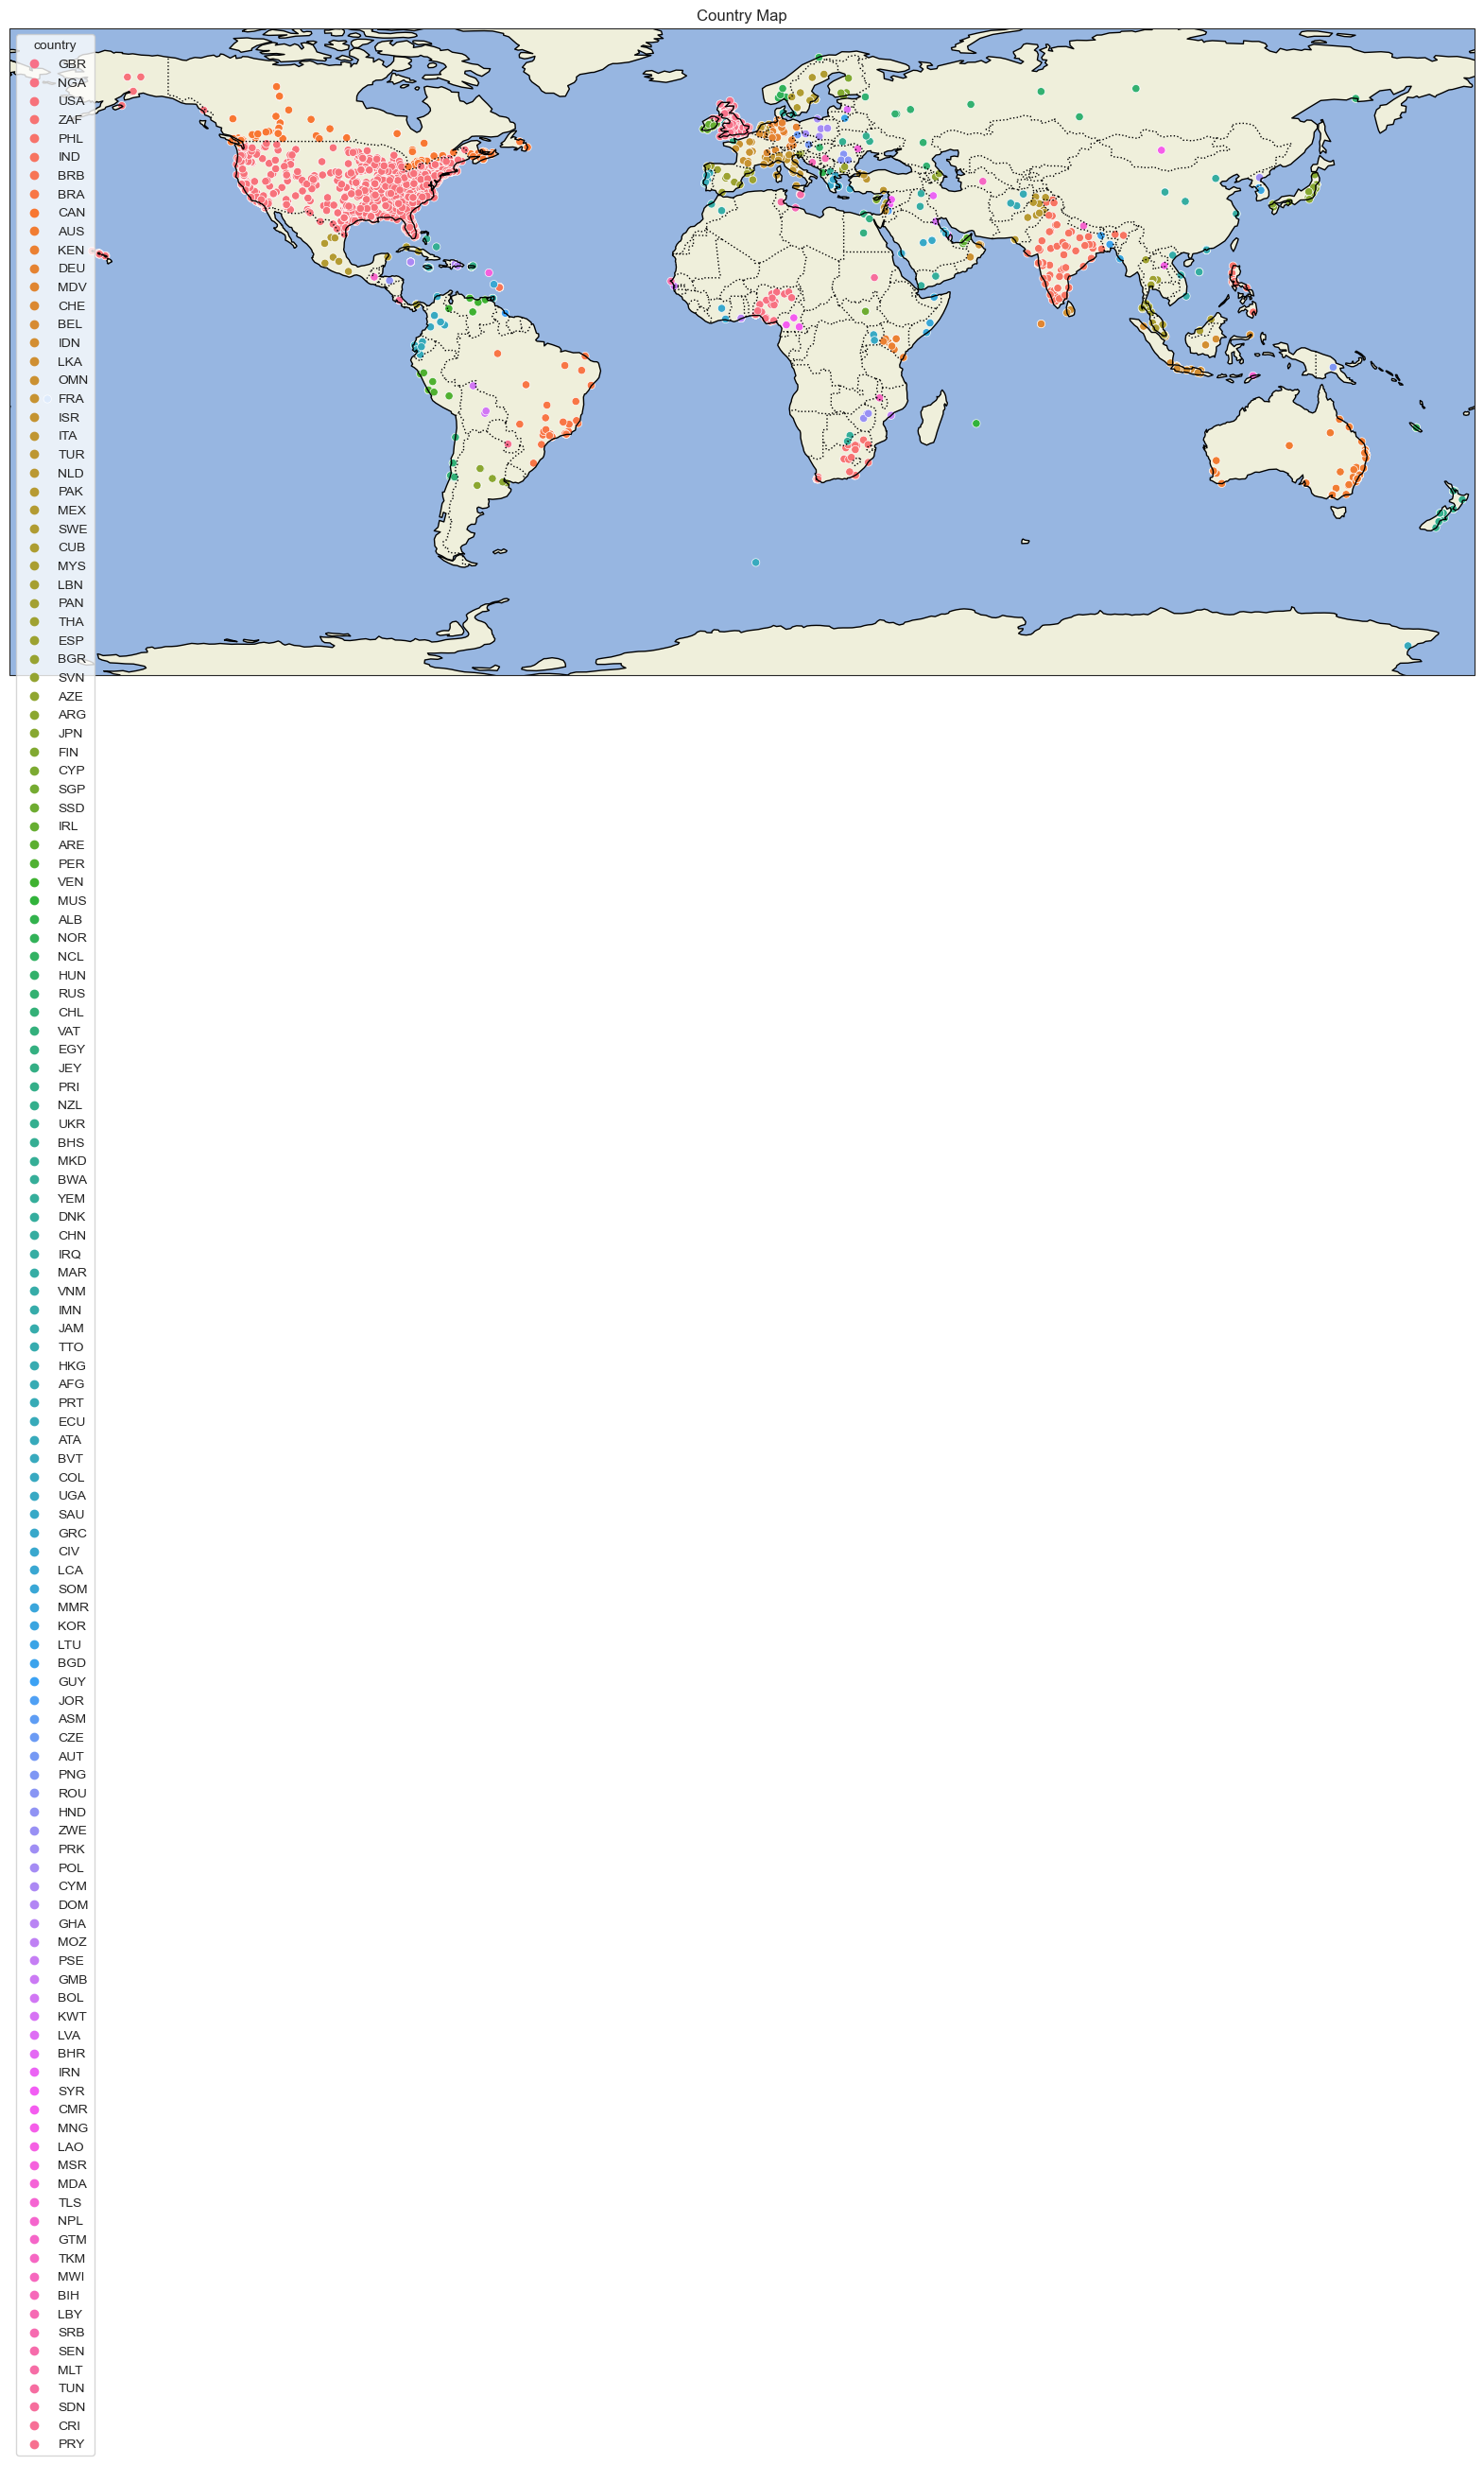

In [12]:
# Plot country locations with Seaborn
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
sns.scatterplot(x='lon', y='lat', hue='country', data=data, ax=ax, transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.set_title('Country Map')
plt.show()


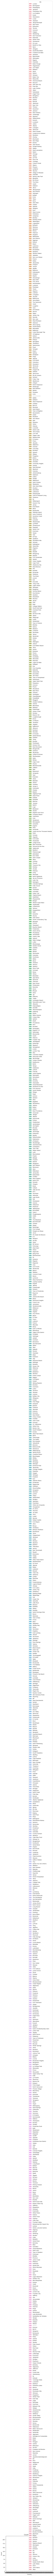

In [13]:
# Set title and labels
sns.countplot(x='country', hue='city', data=data)
plt.title('Country vs City')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()
